![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_score
0,0,1969-11-01,Italy,France,1,0,Euro,1
1,1,1969-11-01,Denmark,England,4,3,Euro,7
2,2,1969-11-02,England,France,2,0,Euro,2
3,3,1969-11-02,Italy,Denmark,3,1,Euro,4
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship,5


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_score
0,0,1872-11-30,Scotland,England,0,0,Friendly,0
1,1,1873-03-08,England,Scotland,4,2,Friendly,6
2,2,1874-03-07,Scotland,England,2,1,Friendly,3
3,3,1875-03-06,England,Scotland,2,2,Friendly,4
4,4,1876-03-04,Scotland,England,3,0,Friendly,3


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_score
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total_score
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


Women sample size is:  200
Male sample size is:  384


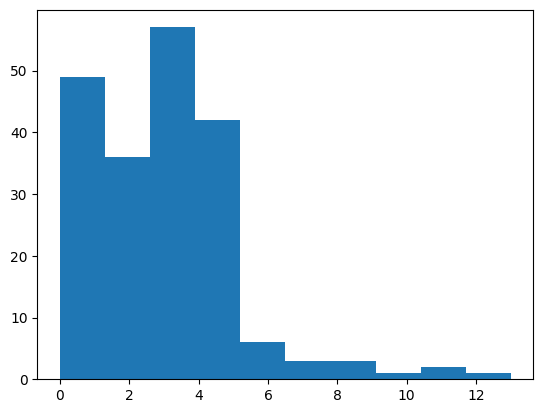

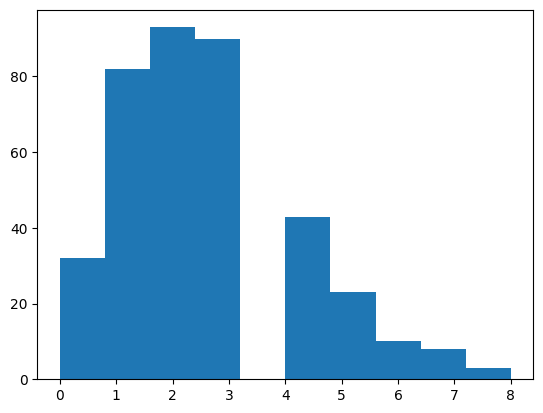

KstestResult(statistic=0.8113447460685429, pvalue=9.431656241073109e-144)
As P value is much smaller than significance level, women sample DO NOT fits normal distribution
KstestResult(statistic=0.7580114127352096, pvalue=4.802304083566536e-230)
Men P value also is smaller than significance level, sample size is not normally distributed


In [64]:
# Start your code here!
import numpy as np
from scipy import stats
import pandas as pd
import pingouin
import matplotlib.pyplot as plt

women_matches = pd.read_csv("women_results.csv", parse_dates=True)
men_matches = pd.read_csv("men_results.csv", parse_dates=True)

### Creating total score column for further analysis
women_matches["total_score"] = women_matches["home_score"] + women_matches["away_score"]
display(women_matches.head())
men_matches["total_score"] = men_matches["home_score"] + men_matches["away_score"]
display(men_matches.head())

### Filtering rows where tournament is "FIFA World Cup" and took place after 2002-01-01
women_filtered = women_matches[women_matches["tournament"] == "FIFA World Cup"]
women_filtered = women_filtered[women_filtered["date"] > "2002-01-01"]
display(women_filtered.head())
men_filtered = men_matches[men_matches["tournament"] == "FIFA World Cup"]
men_filtered = men_filtered[men_filtered["date"] > "2002-01-01"]
display(men_filtered.head())

### Checking length size and distribution of sample
print("Women sample size is: ", len(women_filtered))
print("Male sample size is: ", len(men_filtered))
plt.hist(women_filtered["total_score"])  # Removed 'kind' argument
plt.show()
plt.hist(men_filtered["total_score"])  # Removed 'kind' argument
plt.show()

### Running Kolgomorov-Smirnov test to determine if sample is normally distributed
significance_level = 0.1
print(stats.kstest(women_filtered["total_score"], stats.norm.cdf))
print("As P value is much smaller than significance level, women sample DO NOT fits normal distribution")
print(stats.kstest(men_filtered["total_score"], stats.norm.cdf))
print("Men P value also is smaller than significance level, sample size is not normally distributed")

### Performing the hypothesis test using Wilcoxon-Mann-Whitney non-parametric test
stats.mannwhitneyu(x=women_filtered["total_score"],y=men_filtered["total_score"],alternative="two-sided")
p_val = stats.mannwhitneyu(x=women_filtered["total_score"],y=men_filtered["total_score"],alternative="greater").pvalue
result = "reject"

result_dict = {"p_val": p_val, "result": result}
